In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import json
%matplotlib inline
import statsmodels.discrete.discrete_model as sm
import numpy as np
import seaborn as sns

pd.options.display.max_columns = 50
pd.options.display.max_colwidth = 300

from sklearn.linear_model import LogisticRegression

In [3]:
data = pd.read_table('https://raw.githubusercontent.com/ga-students/DSI-CHI-1/master/lessons/week-04/3.2-logistic-regression-lab/assets/datasets/train.tsv?token=AADi60OIWxcMOJfIkxH6fQxRKkVvZuV_ks5YGh92wA%3D%3D')

In [4]:
data['title'] = data.boilerplate.map(lambda x: json.loads(x).get('title', ''))
data['body'] = data.boilerplate.map(lambda x: json.loads(x).get('body', ''))

In [5]:
data.head()

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label,title,body
0,http://www.bloomberg.com/news/2010-12-23/ibm-predicts-holographic-calls-air-breathing-batteries-by-2015.html,4042,"{""title"":""IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries"",""body"":""A sign stands outside the International Business Machines Corp IBM Almaden Research Center campus in San Jose California Photographer Tony Avelar Bloomberg Buildings stand at...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,0.443783,0.0,0,0.090774,0,0.245831,0.003883,1,1,24,0,5424,170,8,0.152941,0.079130,0,"IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries",A sign stands outside the International Business Machines Corp IBM Almaden Research Center campus in San Jose California Photographer Tony Avelar Bloomberg Buildings stand at the International Business Machines Corp IBM Almaden Research Center campus in the Santa Teresa Hills of San Jose Califor...
1,http://www.popsci.com/technology/article/2012-07/electronic-futuristic-starting-gun-eliminates-advantages-races,8471,"{""title"":""The Fully Electronic Futuristic Starting Gun That Eliminates Advantages in Races the fully electronic, futuristic starting gun that eliminates advantages in races the fully electronic, futuristic starting gun that eliminates advantages in races"",""body"":""And that can be carried on a pla...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,0.468649,0.0,0,0.098707,0,0.203490,0.088652,1,1,40,0,4973,187,9,0.181818,0.125448,1,"The Fully Electronic Futuristic Starting Gun That Eliminates Advantages in Races the fully electronic, futuristic starting gun that eliminates advantages in races the fully electronic, futuristic starting gun that eliminates advantages in races",And that can be carried on a plane without the hassle too The Omega E Gun Starting Pistol Omega It s easy to take for granted just how insanely close some Olympic races are and how much the minutiae of it all can matter The perfect example is the traditional starting gun Seems easy You pull a tr...
2,http://www.menshealth.com/health/flu-fighting-fruits?cm_mmc=Facebook-_-MensHealth-_-Content-Health-_-FightFluWithFruit,1164,"{""title"":""Fruits that Fight the Flu fruits that fight the flu | cold & flu | men's health"",""body"":""Apples The most popular source of antioxidants in our diet one apple has an antioxidant effect equivalent to 1 500 mg of vitamin C Apples are loaded with protective flavonoids which may prevent hea...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,0.525448,0.0,0,0.072448,0,0.226402,0.120536,1,1,55,0,2240,258,11,0.166667,0.057613,1,Fruits that Fight the Flu fruits that fight the flu | cold & flu | men's health,Apples The most popular source of antioxidants in our diet one apple has an antioxidant effect equivalent to 1 500 mg of vitamin C Apples are loaded with protective flavonoids which may prevent heart disease and cancer Next Papayas With 250 percent of the RDA of vitamin C a papaya can help kick ...
3,http://www.dumblittleman.com/2007/12/10-foolproof-tips-for-better-sleep.html,6684,"{""title"":""10 Foolproof Tips for Better Sleep "",""body"":""There was a period in my life when I had a lot of problems with sleep It took me very long to fall asleep I was easily awaken and I simply wasn t getting enough of rest at night I didn t want to take medication and this led me to learn sever...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,0.480725,0.0,0,0.095861,0,0.265656,0.035343,1,0,24,0,2737,120,5,0.0

In [6]:
data[['title', 'label', 'alchemy_category']].head(10)

,title,label,alchemy_category
0,"IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries",0,business
1,"The Fully Electronic Futuristic Starting Gun That Eliminates Advantages in Races the fully electronic, futuristic starting gun that eliminates advantages in races the fully electronic, futuristic starting gun that eliminates advantages in races",1,recreation
2,Fruits that Fight the Flu fruits that fight the flu | cold & flu | men's health,1,health
3,10 Foolproof Tips for Better Sleep,1,health
4,The 50 Coolest Jerseys You Didn t Know Existed coolest jerseys you haven't seen,0,sports
5,Genital Herpes Treatment,0,?
6,fashion lane American Wild Child,1,arts_entertainment
7,Racing For Recovery by Dean Johnson racing for recovery by dean johnson - - insidershealth.com,0,?
8,Valet The Handbook 31 Days 31 days,1,?
9,Cookies and Cream Brownies How Sweet It Is,1,?


In [7]:
data.alchemy_category.value_counts()

?                     2342
recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
unknown                  6
weather                  4
Name: alchemy_category, dtype: int64

In [8]:
data.alchemy_category_score.value_counts()

?            2342
0.85           82
0.0784091      40
0.849999       12
0.535009       10
0.70677         9
0.33273         7
0.400001        6
0.65146         6
0.9             5
0.849997        5
0.4875          4
0.25991         3
0.899999        3
0.21965         3
0.899997        3
0.786501        3
0.722028        3
0.849995        3
0.849994        3
0.287329        3
0.216152        2
0.79168         2
0.849798        2
0.551474        2
0.710557        2
0.844944        2
0.849945        2
0.679138        2
0.514763        2
             ... 
0.940084        1
0.278481        1
0.370237        1
0.515187        1
0.790715        1
0.469064        1
0.445205        1
0.652213        1
0.691545        1
0.619172        1
0.741346        1
0.865489        1
0.727485        1
0.422987        1
0.289661        1
0.583159        1
0.729716        1
0.52886         1
0.84856         1
0.355573        1
0.72128         1
0.799012        1
0.295764        1
0.703065        1
0.28778   

In [9]:
b = data[(data.alchemy_category == '?')&(data.alchemy_category_score == '?')]

In [10]:
data.is_news.value_counts()

1    4552
?    2843
Name: is_news, dtype: int64

In [11]:
data.news_front_page.value_counts()

0    5853
?    1248
1     294
Name: news_front_page, dtype: int64

In [12]:
data.boilerplate

0       {"title":"IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries","body":"A sign stands outside the International Business Machines Corp IBM Almaden Research Center campus in San Jose California Photographer Tony Avelar Bloomberg Buildings stand at...
1       {"title":"The Fully Electronic Futuristic Starting Gun That Eliminates Advantages in Races the fully electronic, futuristic starting gun that eliminates advantages in races the fully electronic, futuristic starting gun that eliminates advantages in races","body":"And that can be carried on a pla...
2       {"title":"Fruits that Fight the Flu fruits that fight the flu | cold & flu | men's health","body":"Apples The most popular source of antioxidants in our diet one apple has an antioxidant effect equivalent to 1 500 mg of vitamin C Apples are loaded with protective flavonoids which may prevent hea...
3       {"title":"10 Foolproof Tips for Better Sleep ","body":"There was a p

In [13]:
# a = pd.get_dummies(data['alchemy_category'])
a = b.copy()
for elem in a['alchemy_category'].unique():
    a[str(elem)] = a['alchemy_category'] == elem
# a = pd.get_dummies(b, columns=['alchemy_category'])

In [14]:
# a[titles].head()

In [15]:
a.computer_internet.dtype

AttributeError: 'DataFrame' object has no attribute 'computer_internet'

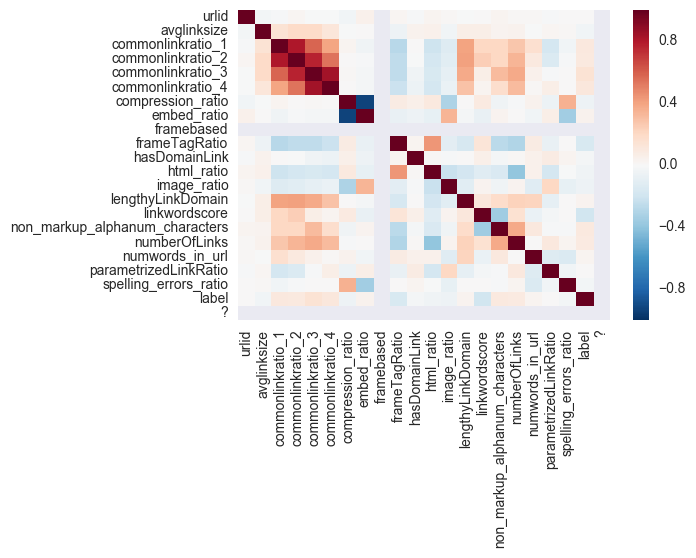

In [16]:
sns.heatmap(a.corr())

In [17]:
a['mean_common_link'] = (a['commonlinkratio_1']+a['commonlinkratio_2']+a['commonlinkratio_3']+a['commonlinkratio_4'])/3

In [18]:
# a['mean_common_link']

In [19]:
np.abs(a.corr()['label']).sort_values()

urlid                             0.001266
parametrizedLinkRatio             0.005085
hasDomainLink                     0.019464
spelling_errors_ratio             0.025731
numwords_in_url                   0.028825
lengthyLinkDomain                 0.031606
avglinksize                       0.033502
embed_ratio                       0.039341
html_ratio                        0.041172
compression_ratio                 0.047239
image_ratio                       0.048109
numberOfLinks                     0.088980
non_markup_alphanum_characters    0.093821
commonlinkratio_2                 0.098227
commonlinkratio_1                 0.108815
commonlinkratio_4                 0.112548
mean_common_link                  0.129290
commonlinkratio_3                 0.143104
frameTagRatio                     0.156665
linkwordscore                     0.188202
label                             1.000000
framebased                             NaN
?                                      NaN
Name: label

In [20]:
names = [hasDomainLink, image_ratio, avglinksize, unknown, 
parametrizedLinkRatio             0.013933
law_crime                         0.015590
urlid                             0.018960
religion                          0.024504
weather                           0.029208
science_technology                0.030442
lengthyLinkDomain                 0.032586
culture_politics                  0.032825
health                            0.036465
gaming                            0.037118
embed_ratio                       0.037649
numwords_in_url                   0.049788
html_ratio                        0.056637
commonlinkratio_4                 0.064703
commonlinkratio_1                 0.071685
compression_ratio                 0.072666
commonlinkratio_2                 0.076427
numberOfLinks                     0.076507
mean_common_link                  0.086167
commonlinkratio_3                 0.087593
spelling_errors_ratio             0.088806
non_markup_alphanum_characters    0.108020
computer_internet                 0.135734
arts_entertainment                0.140316
linkwordscore                     0.166885
business                          0.177250
sports                            0.178772
recreation                        0.188109
frameTagRatio                     0.202913]


SyntaxError: invalid syntax (<ipython-input-20-e75701606064>, line 2)

In [21]:
names = ['linkwordscore', 'non_markup_alphanum_characters', 'frameTagRatio', 
         'business', 'recreation', 'arts_entertainment', 'computer_internet', 
         'sports','mean_common_link']
logit = LogisticRegression()

In [22]:
import itertools

stuff = [1, 2, 3]
for L in range(0, len(stuff)+1):
  for subset in itertools.combinations(stuff, L):
    print(subset)


()
(1,)
(2,)
(3,)
(1, 2)
(1, 3)
(2, 3)
(1, 2, 3)


In [23]:
# a[names]

In [24]:
X = a[names]
y = a.label

KeyError: "['business' 'recreation' 'arts_entertainment' 'computer_internet' 'sports'] not in index"

In [25]:
model = logit.fit(X, y)
model.score(X, y)

NameError: name 'X' is not defined

In [26]:
print np.array(y)
print np.array(X)

NameError: name 'y' is not defined

In [27]:
X.linkwordscore

NameError: name 'X' is not defined

In [28]:
# logit = sm.Logit(np.array(y), np.array(X))
logit = sm.Logit(y, X[['business', 
         'recreation', 'arts_entertainment', 'computer_internet']])

NameError: name 'y' is not defined